In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import pandas as pd

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)


## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

[(78.0),
 (76.0),
 (78.0),
 (76.0),
 (77.0),
 (78.0),
 (77.0),
 (78.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (78.0),
 (78.0),
 (77.0),
 (77.0),
 (82.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (76.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (78.0),
 (73.0),
 (70.0),
 (76.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (78.0),
 (77.0),
 (77.0),
 (78.0),
 (78.0),
 (77.0),
 (78.0),
 (78.0),
 (75.0),
 (76.0),
 (76.0),
 (77.0),
 (78.0),
 (76.0),
 (77.0),
 (75.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (77.0),
 (77.0),
 (76.0),
 (78.0),
 (77.0),
 (76.0),
 (77.0),
 (76.0),
 (76.0),
 (77.0),
 (77.0),
 (78.0),
 (77.0),
 (77.0),
 (77.0),
 (76.0),
 (75.0),
 (76.0),
 (76.0),
 (77.0),
 (76.0),
 (73.0),
 (73.0),
 (75.0),
 (77.0),
 (76.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (79.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (78.0),
 (77.0),
 (76.0),
 (78.0),
 (78.0),
 (77.0),
 (78.0),
 (78.0),
 (73.0),
 (76.0),
 (77.0),
 (75.0),
 (76.0),
 (74.0),
 

In [5]:
#  3. Convert the June temperatures to a list.
results_june=session.query( Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
print(type(results_june))

<class 'list'>


In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df_june = pd.DataFrame(results_june, columns=['June Temps'])
df_june

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_june.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query( Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()


[(76.0),
 (74.0),
 (74.0),
 (64.0),
 (64.0),
 (67.0),
 (77.0),
 (66.0),
 (69.0),
 (68.0),
 (68.0),
 (71.0),
 (74.0),
 (67.0),
 (66.0),
 (69.0),
 (71.0),
 (70.0),
 (70.0),
 (74.0),
 (74.0),
 (71.0),
 (75.0),
 (75.0),
 (72.0),
 (69.0),
 (68.0),
 (73.0),
 (74.0),
 (73.0),
 (73.0),
 (73.0),
 (73.0),
 (71.0),
 (73.0),
 (73.0),
 (77.0),
 (72.0),
 (71.0),
 (73.0),
 (70.0),
 (73.0),
 (69.0),
 (74.0),
 (72.0),
 (71.0),
 (72.0),
 (72.0),
 (70.0),
 (73.0),
 (73.0),
 (72.0),
 (73.0),
 (73.0),
 (72.0),
 (63.0),
 (65.0),
 (71.0),
 (76.0),
 (70.0),
 (76.0),
 (69.0),
 (69.0),
 (69.0),
 (74.0),
 (76.0),
 (74.0),
 (73.0),
 (73.0),
 (74.0),
 (73.0),
 (73.0),
 (73.0),
 (74.0),
 (74.0),
 (71.0),
 (73.0),
 (72.0),
 (64.0),
 (66.0),
 (73.0),
 (72.0),
 (65.0),
 (64.0),
 (69.0),
 (68.0),
 (77.0),
 (71.0),
 (71.0),
 (69.0),
 (68.0),
 (68.0),
 (69.0),
 (70.0),
 (72.0),
 (76.0),
 (75.0),
 (69.0),
 (71.0),
 (71.0),
 (71.0),
 (68.0),
 (65.0),
 (70.0),
 (69.0),
 (69.0),
 (71.0),
 (67.0),
 (73.0),
 (74.0),
 (73.0),
 

In [9]:
# 7. Convert the December temperatures to a list.
results_dec=session.query( Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
print(type(results_dec))

<class 'list'>


In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dec =pd.DataFrame(results_dec, columns=['Dec Temps'])
df_dec

,Dec Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dec.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [12]:
#Temperature distrbution with year wise details
results_1=session.query( func.avg(Measurement.tobs), func.max(Measurement.tobs), func.min(Measurement.tobs),extract('month', Measurement.date),extract('year', Measurement.date)).group_by(extract('year', Measurement.date),extract('month', Measurement.date)).filter(extract('month', Measurement.date).in_([12,6])).all()
df_add1 =pd.DataFrame(results_1, columns=['Avg Temps', 'Max Temps','Min Temps','Month_Num','Year_Num'])
df_add1

,Avg Temps,Max Temps,Min Temps,Month_Num,Year_Num
0,74.925620,85.0,67.0,6,2010
1,70.208511,80.0,58.0,12,2010
2,73.938326,82.0,65.0,6,2011
3,70.820628,77.0,63.0,12,2011
4,74.000000,81.0,68.0,6,2012
5,71.188073,80.0,61.0,12,2012
6,74.599078,81.0,66.0,6,2013
7,71.094017,83.0,63.0,12,2013
8,75.027907,84.0,67.0,6,2014
9,69.896861,81.0,56.0,12,2014


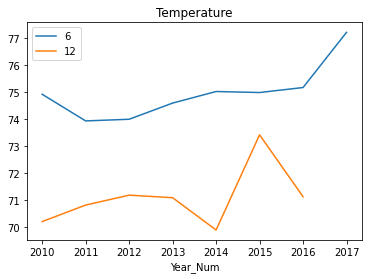

In [13]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig, ax = plt.subplots()

for key, grp in df_add1.groupby(['Month_Num']):
    ax = grp.plot(ax=ax, kind='line', x='Year_Num', y='Avg Temps',label=key)

plt.legend(loc='best')
plt.title("Temperature")

# show graph
plt.show()

In [14]:

results_2=session.query( func.avg(Measurement.prcp), func.max(Measurement.prcp), func.min(Measurement.prcp),extract('month', Measurement.date),extract('year', Measurement.date)).group_by(extract('year', Measurement.date),extract('month', Measurement.date)).filter(extract('month', Measurement.date).in_([12,6])).all()
df_add2 =pd.DataFrame(results_2, columns=['Avg Prcp', 'Max Prcp','Min Prcp','Month_Num','Year_Num'])
df_add2

,Avg Prcp,Max Prcp,Min Prcp,Month_Num,Year_Num
0,0.042241,0.88,0.0,6,2010
1,0.459087,5.04,0.0,12,2010
2,0.240142,4.43,0.0,6,2011
3,0.201581,6.42,0.0,12,2011
4,0.097062,1.84,0.0,6,2012
5,0.089604,2.25,0.0,12,2012
6,0.144195,2.80,0.0,6,2013
7,0.169014,2.40,0.0,12,2013
8,0.124372,1.45,0.0,6,2014
9,0.188439,4.03,0.0,12,2014


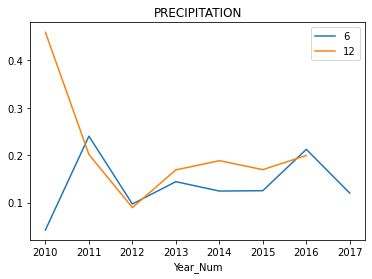

In [15]:
fig, ax = plt.subplots()

for key, grp in df_add2.groupby(['Month_Num']):
    ax = grp.plot(ax=ax, kind='line', x='Year_Num', y='Avg Prcp',label=key)

plt.legend(loc='best')
plt.title("PRECIPITATION")
# show graph
plt.show()